

# CS-456, Fall 2023, Modern Cyber Security
---

## TLS - Transport Layer Security and HTTPS - Secure HyperText Transfer Protocol
### Due by:


1.   Deliverable 1:\[25 points\] <font color =red> Monday, Nov 27, 11:59pm </font>
2.   Deliverable 2:\[25 points\] <font color =red> Monday, Dec 4, 11:59pm </font>







### Setup
---
All of the python libraries and command dependencies to successfully run this lab should already be installed and available on the CS lab machines.  This jupyter notebook can be run on a CS lab machine and you can use SSH tunnels to view the notebook on your local laptop.

If you are using the lab machines, take heed of the following:

In order to use both flask (anaconda-distributed) and cryptography (python3.8 site package) in lab machines we need following two exports exactly in this format, since python should use system-installed-python3.8's cryptography package before it reaches to anaconda distributed openssl. The anaconda/bin has to be appended at the end of PATH.


>`export PYTHONPATH="/usr/lib64/python3.8/site-packages:/usr/local/anaconda/lib/python3.8/site-packages:$PYTHONPATH"`

>`export PATH=$PATH:/usr/local/anaconda/bin`

This project requires you to call api from certificate authority server and repository server that are hosted on a lab machine. Due to this, whenevr you are calling any api from these servers, that must be done from a lab machine.

####References
you can look into these links for help with this assignment:

1.   [*Exploring HTTPS with Python*](  https://realpython.com/python-https/)
2.   [OPENSSL Cheat Sheet](https://www.freecodecamp.org/news/openssl-command-cheatsheet-b441be1e8c4a/)








<a id='deploy_web_server'></a>
## 1. Create and deploy a simple FLASK web server
---
In this section you are going to create a simple web server using FLASK.  We can then use `wget`, `curl` or simply use a web browser to fetch the contents of the web page.  


Use SHIFT-EXECUTE to execute the following code cell.  This first cell will simply write the python code to a file named `simple-server.py`.  

**Next, use a new terminal window (or tab) to run the program by typing `python simple-server.py`.  Leave the program running and come back to this notebook.**

*Note: you may have to `pip install flask` if it is not installed in your system.  The lab systems should already have it installed.  Do this installation in a separate terminal window.*

In [ ]:
%%writefile simple-server.py

# web-server.py
# secret message about squirrels!

from flask import Flask

#Put your secret message
SECRET_MESSAGE = "secret message"
app = Flask(__name__)

@app.route("/")
def get_secret_message():
    return SECRET_MESSAGE

if __name__ == "__main__":
    app.run(port=4567)

Let's make sure the server is running. Go to a web browser and enter the following URL:

> `http://localhost:4567`

You should get the following super-exciting response to your HTTP request:

<img src='http://cs.colostate.edu/~cs456/images/TLS_Browser_Screen.png' width='600px' />

You can also use `wget` and `curl` commands to fetch the data from your tiny web server.  Execute the following shell commands in the next two cells using SHIFT-EXECUTE. In both cases the web server should return the secret message.  

In [ ]:
! wget -qO- localhost:4567

In [ ]:
! curl http://localhost:4567

Run one of the cells again, but this time capture the network traffic on localhost using wireshark.  Your wireshark data should look like the screen capture shown below.  Notice that anyone listening in can see the secret message.  This is definitely not a good state of affairs...

----


<img src=http://cs.colostate.edu/~cs456/images/TLS_Wireshark_1.png width="750px" />

**You should stop the web server now by using CTL-C in the terminal window.  We will start it up again later with TLS enabled.**

<a id='create_certificates'></a>

## Task 1 [4 points]
---


1.   Get the simple server running on your machine and Submit a screenshot of the network traffic on localhost while using wireshark in the below cell. [2 points]



 ---Complete Your response to Task 1 Q1. Put your screenshot here.

2.   Exlain why you could see the the secret mesage? [2 points]

 ---Complete Your response to Task 1 Q2. Your answer should be a concise explanation.



<a id='create_certificates'></a>

## 2. Create the x.509 Certificates needed by TLS
---

x.509 public-key certificates are used during a TLS handshake to establish a secure encrypted internet connection.

As an analogy, think of TLS certificates as passports for the internet. In order to travel to another country in the real world you have to get a passport issued from your home country. Information in the passport shows informations such as "issued by", "issued to", and the validity period from "issue date" to "expiration date".

To get a passport you have to apply for one in your home country and prove you are who you say you are by providing various credentials such as birth certificate, driver's license, etc. Furthermore, not just any entity can issue a passport.

TLS certificates are issued in a similar manner. Instead of being issued by a country, certificates are issued by well-known Trusted Third Parties known as Certificate Authorities (CA). What is meant by "well-known"? A CA must go through rigorous checks and follow strict security procedures before it can become certified as a CA. Web browsers maintain a list of registered CAs that they then use as roots-of-trust. Any certificate issued by one of these CAs is considered as trustworthy by your web browser.

How many CAs are there on planet Earth? There are hundreds of CAs throughout the globe. Your web browser keeps a list of trusted CA's in your web browser's trust-store. In Firefox you can view the list of trusted CAs by going to Preferences, Security & Privacy, View Certificates. There are similar mechanisms in other browsers.
A sample screen-shot showing just a few of the trusted CAs in Firefox is shown below:

<img src="http://cs.colostate.edu/~cs456/images/TLS_CA_List.png" width='700px' />

<a id='create_web_certificate'> </a>
### 2.1. Create Your Web Server Certificate
----

There are several steps required to generate your site's web server certificate:

1. Create a Certificate Signing Request (CSR) which contains your public key: This is like filling out the information for your visa.
2. Send the CSR to a "Trusted Third Party (TTP)" Certificate Authority (CA): This is like sending your information into a visa application office.
3. The CA will verify your information:  CAs use a variety of verification techniques.
4. The CA  then approves your Public Key by digitally signing your CSR. This is equivalent to the TTP signing your visa.
5. Issue the verified Public Key certificate: This is equivalent to you receiving your visa in the mail.




<a id='deploy_web_server'></a>
## 2.1.A. Create a Certificate Signing Request (CSR)

----

<a id='create_CSR'> </a>
#### Create a Certificate Signing Request (CSR)

The first step to your web server becoming trusted is for you to generate a Certificate Signing Request (CSR). In the real world, the CSR would be sent to an actual Certificate Authority like Verisign or Let’s Encrypt. In this lab assignment, We have created our own CA which you will be using.

You can create the CSR using `openssl` or by writing your own piece of code.



### Make sure to use your name or student ID in your certificate
* For "organizational unit name", use your own name so the TAs can verify you did your own work.

### Make sure you save the PRIVATE KEY corresponding to the Public KEY in your CSR



**In the next code cell put your openssl command or your code for creating the csr:**

In [ ]:
#Complete this command/code
#generate your private key and csr






<a id='deploy_web_server'></a>
## 2.1.B. Verify the CSR

----
Next, make sure the CSR got created properly. Execute the following cell to view the contents of the CSR. If you don't like what you see, just re-execute the python code/OPENSSL request to re-create the CSR

In [ ]:
! openssl req -text -noout -verify -in CSR.csr


<a id='deploy_web_server'></a>
## 2.2. Certificate Authority Server

----

We have created our own certificate authrity server. Like any other trusted CA, this will sign your CSR and create a public key certificate for the public key you sent in your CSR.


## 2.2.A. Activate account

----
For each student, there is an inactive account created in our CA server. You need to use your `eid` as username and `csu id` as password.

Use the following URL to access the activation api on our CA server:
> `https://129.82.44.147:10200/active-account?username=your_eid&password=your_csu_id`

This will activate your account and return your `account id` in the response. This id will be used in later communications.
In case you forget your `id`, you can call the same api again. You will get a response like this:
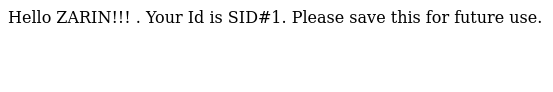


For future use you have to use the Id after the prefix string `‘SID#’`. In above case my Id is 1.


<a id='deploy_web_server'></a>
## 2.2.B. Submit the CSR to be digitally signed by the CA

----
In the real world, the CA would make sure that the information in your CSR are correct, like you owned invykta.com (or whatever you called your web-site) and ask you to prove it in various ways.

So when you call the CA server api to sign the CSR, it will verify your CSR and respond with x509 publick key certificate signed by the CA. So, you need to save the x509 certificate of your server you recieved from the CA in your machine.

Complete the python code below to call the CA server and get your x509 server public key certificate. This cell will write the python code to a file named sign-csr.py. **In the submission this code should be completed.**



In [ ]:
%%writefile sign-csr.py


import requests


# Load The CSR content
csr_file = ---COMPLETE---
csr_content = ---COMPLETE---


# URL of the API endpoint
url = "https://129.82.44.147:10200/sign-csr?sid=your_student_id"  #Dont forget to put your student id

# Sending the request with csr_content as form data
response = requests.get(url, data={'csr_content': csr_content})


# Check if the request was successful
if response.status_code == 200:

    filename = "your_server_cert.pem"  #update the file name  to suit your server cert name

    # Save content of the response into the a file
    ---COMPLETE---

else:
    #Try again in this case
    print(f"Error with status code: {response.status_code}")
    print(response.text)



Writing sign-csr.py


Next, use a new terminal window (or tab) to run the program by typing: python sign-csr.py. This will generate a server certificate file in the directory. make sure your CSR.csr file is in correct directory.

## Task 2 [16 Points]

----


1. Activating your account through calling the CA server api. Submit a screenshot of the response in the below cell. [3 points]


--- put your answer to Task 2 Q1 here.

2. Take a screenshot of the response of CSR verification command (in 2.1.B) of your CSR that you generated in 2.1.A. [5 points]

--- put your answer to Task 2 Q2 here. This should be a screenshot of your CSR verification.


3. Use our CA api to send your csr to the CA to get your signed x509 public key certificate. Our CA server will store all the information passed through this api call. So apart from completing the sign-csr.py script and calling the api,  no further action is required. The code should save your x509 certificate in the specified file [6 points]


4.   To verify your server's certificate, execute the cell below. [2 points]

In [ ]:
# make sure the new server certificate file has been created and examine it in BASE64 and with openSSL. Use the right certificate file name
! ls server*
! cat eto_cert.pem
! openssl x509 -in eto_cert.pem -text -noout

ls: cannot access 'server*': No such file or directory
-----BEGIN CERTIFICATE-----
MIIDRzCCAi+gAwIBAgIUeYpw1HpOp20NKGEvIUWHOih2FA8wDQYJKoZIhvcNAQEL
BQAweTELMAkGA1UEBhMCVVMxETAPBgNVBAgMCENvbG9yYWRvMRUwEwYDVQQHDAxG
b3J0IENvbGxpbnMxHTAbBgNVBAoMFENTNDU2IFRydXN0d29ydGh5IENBMSEwHwYD
VQQDDBhjczQ1Ni10cnVzdHdvcnRoeS1jYS5jb20wHhcNMjMxMjAxMDU0NjMwWhcN
MjMxMjMxMDU0NjMwWjBCMQswCQYDVQQGEwJYWDEVMBMGA1UEBwwMRGVmYXVsdCBD
aXR5MRwwGgYDVQQKDBNEZWZhdWx0IENvbXBhbnkgTHRkMIIBIjANBgkqhkiG9w0B
AQEFAAOCAQ8AMIIBCgKCAQEAnsa4ywaZjWP8zsrCctY0dRLUYEyYw379wlGdDIuo
ibkg2kNG9LpeRgVnFYddv8lw/cmnRCqJV6B3QWYV3xSUBH2MvC9Op4VGjN2cTP9B
txcM1t+exUjnQ3DN7GoX/TcJGce7M/SJqcb+CQyA4gmJiEvNqOGa2j6/P+4GLpoC
msdMvpQ71qLMr6zASNyk/EFlVgn3PLKCt3GUMYd0789TqaBOg6G9e0Z8glHoa7Y6
+Q4vgbK4QcmenQL8gQkulCBhoCQ4H+Dexs27032Tuc5/Rh6c5b751hSXohg/P/NC
opb1n6yDEjdARXykxo4Z5VKt2eaiYt+tL8fnKjN86OvtpQIDAQABMA0GCSqGSIb3
DQEBCwUAA4IBAQCKQfPrGRvtsO4R3Z7D37JxCw45l1ANi8Gn+kIIQY2gg2vjgonB
rJyrAw3woD7Mminp9jWqpWsYiEASEmBpaBjM5HvuwOzZvvejX8SmRwKsWe69Hy8T
JmlA4k2

## 3  Test your TLS certificate with your web server

We have to make a minor adjustment to the FLASK web server to enable TLS/HTTPS. You will see this adjustment in the last line of code below.

Use SHIFT-EXECUTE to execute the following code cell to over-write `simple-server.py` with TLS enabled.  

**Next, use a new terminal window (or tab) to run the program by typing `python simple-server.py`.  In the code below the web server will read the private key from `'server-private-key.key'` and the public key from your certificate file `'server-public-key.pem'`.**


**Leave the program running and come back to this notebook.**

In [ ]:
%%writefile simple-server.py

from flask import Flask

SECRET_MESSAGE = "Secret Message"
app = Flask(__name__)

@app.route("/")
def get_secret_message():
    return SECRET_MESSAGE

if __name__ == "__main__":
    #Please check whether the key and cert names are correct
    app.run(port=4567, ssl_context=( 'server-public-key.pem', 'server-private-key.key') )  #ssl_context=('cert.crt', 'key.pem'))

Now bring up a web browser and enter the following into the URL bar:

>`http://localhost:4567`

This command should fail to bring up the web page because it didn't specify HTTPS.  Try again with the following, and capture the web traffic with wireshark.

>`https://localhost:4567`

your browser may not trust the certificate yet, so you need to go through the browser options to "view the certificate" and take a screenshot to submit to Canvas.  

Tell your browser that you "accept the risk" and proceed to view your simple web page with HTTPS.

Examine the wireshark output and you will notice that the TLS handshake has occurred and the data has been encrypted. submit a screenshot of the wireshark.


## Task 3 [5 points]
----
1. submit screenshot of your signed certificate used to access the web server in browser view [2 points]


--- Complete your response to Task 3 Q1


2. submit screenshot showing the TLs handshake and encrypted trafic in  wireshark [3 points]

--- Complete your response to Task 3 Q2


---
## <font color =blue> Deliverable 1 \[25 points\]:  Monday, Nov 27, 11:59pm </font>
1. Complete all the tasks above, task 1 to task 3. In the code cell below each task, submit your answers.
2. Make sure you are maintaining proper directory for all the additional files.
3. Zip all the required files along with this notebook. Name it as `your_eid_D1.ipynb`  and submit to canvas.
---


<a id='deploy_web_server'></a>
## 4. Repository Server

----
The repository server contains a collection of randomly generated certificates. The certificates can be valid, expired and/or revoked. each certificate is associated with an Id. You will be assigned a list of certificates and your task is to verify the expiration and revokation status of each certificate.


## 4.1. Get the id's of your assigned Certificates from Repository Server

----
First, you need to get your assigned certificate list. You can call the following api to get the list:


> `https://129.82.44.147:10300/get-cert-list?sid=your_student_id`

In the response you will receive a list of 10 certificate Ids. Your task is to get and verify these certificates using these Id’s.

If you lost this list, you can just call this same api again. This will return the same list of certificate id's for you. The response will look something like this:

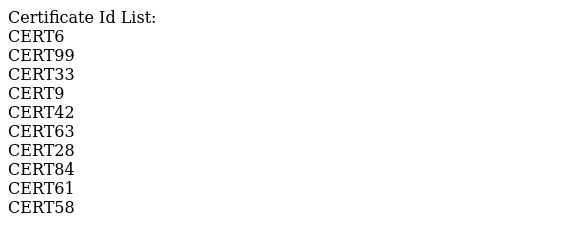


<a id='deploy_web_server'></a>
## 4.2 Get Certificate Content

----
To verify whether a certificate is expired or not you need to get the contents of the certificate. The following api will download the certificate in your machine using its id. From there you can further analyze the certificate.
Remember to put your correct student id (you got from the activation step) and the certificate id from the list you got in the previous step, otherwise it will result in error.


> `https://129.82.44.147:10300//get-certificate?sid=your_student_id&cert_id=CERT6`

After calling the api, the corresponding certificate will be downloaded to your machine. Then you can run your analysis to verify the status.



<a id='deploy_web_server'></a>
## 4.3 Check Certificate status (Expired/Revoked)

### 4.3.A: Is certificte Expired?
View the certificate content to check its expiration date.
### To Submit your verification response for the Expiration Status of a certificate

Execute the following code cell. It will create a python file. Execute that file after filling the `data` dictionary with your answers for the expired status. For each certificate with id `Cert ID` you will put the pair `Cert ID`: **'Y'** as your answer in the dictionary if the Certificate is expired otherwise the pair `Cert ID` : **'N'**.

In response, you will get the number of certificates (out of 10) you correctly verified. You can call this api multiple times and submit your answers again.





In [ ]:
%%writefile submit-expire-status-answers.py

import requests
import json

# The dictionary you want to send to the API. The keys are certificate Id and value should be your Y/N answer.
data = {
    1: 'N',
    2: 'Y',
    3: 'N'
}

# Convert the dictionary to a JSON string
json_data = json.dumps(data)

# The endpoint URL
url = 'https://129.82.44.147:10300/submit-answer/expired-status?sid=your_student_id'



# Make the POST request with the JSON payload
response = requests.post(url, data=json_data, headers={'Content-Type': 'application/json'})

# Check if the request was successful
if response.status_code == 200:
    print(response.content)
else:
    print('An error occurred.', response.text)

### 4.3.B: Is the Certificate REVOKED?

A certificate can be in revoked state even when its not expired. So analysing the certificate content will not be sufficient to further verify whether a certificate is revoked or not. In real world context, the CA can provide such information. So you need to call our CA server for this purpose using the following api:

> `https://129.82.44.147:10200/verify-revoked-status?sid=your_student_id&cert_id=CERT6 `

Remember to put your correct student id (you got from the activation step) and the certificate id from the list you got in the previous step, otherwise it will result in error

 In response this api will return the revocation status of the  certificate.


### Task: Submit Revoked Status Verification response

Execute the following code cell. It will create a python file. Execute that file with your answers as a dictionary of `Cert_Id: status`, where status is  **'Y'** if the certificate is revoked otherwise status is **'N'**.
In response, you will get the number of certificates (out of 10) you correctly verified . You can call this api multiple times to submit your answers again.

In [ ]:
import requests
import json

# The dictionary you want to send to the API. The keys are certificate Id and value should be your answer.
data = {
    1: 'N',
    2: 'N',
    3: 'Y'
}

# Convert the dictionary to a JSON string
json_data = json.dumps(data)

# The endpoint URL
url = 'https://129.82.44.147:10300/submit-answer/revoked-status?sid=1'



# Make the POST request with the JSON payload
response = requests.post(url, data=json_data, headers={'Content-Type': 'application/json'})

# Check if the request was successful
if response.status_code == 200:
    print(response.content)
else:
    print('An error occurred.', response.text)

<a id='deploy_web_server'></a>
## Task 4 [25 points]
----


1. Take a screenshot of the certificate list you are getting from the api response in 4.A \[5 points\]



--- Complete your response for Task 4 Q1.


2. Submit your answers to the list of Certifcates status verification
  * For the list of 10 certificate Id's given to you, download each of them and verify their expiration and revokation status.
  * Then you will submit your expiration status asnwers to the respository server by calling the given api using the code above in (4.3.A) \[10 points\]
  * Then you will submit your revokation status asnwers to the respository server by calling the given api using the code above in (4.3.B) \[10 points\]

---
## <font color =blue> Deliverable 2: \[25 points\] Monday, Dec 8, 11:59pm  </font>
1. Complete task 4. Remember that for the second task, calling the two api with your answers will do.
2. Zip all the required files along with this notebook. Name it as `your_eid_D2.ipynb` and submit to canvas.
---